# Task I: Quantum Computing Part

1. Implement a simple quantum operation with Cirq or Pennylane:
    - With 5 qubits
    - Apply Hadamard operation on every qubit
    - Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
    - SWAP (0, 4)
    - Rotate X with pi/2 on any qubit
    - Plot the circuit
    

2. Implement a second circuit with a framework of your choice:
    - Apply a Hadmard gate to the first qubit
    - Rotate the second qubit by pi/3 around X
    - Apply Hadamard gate to the third and fourth qubit
    - Perform a swap test between the states of the first and second qubit
     $ \ket {q1q2} $ and the third and fourth qubit $ \ket {q3q4} $


In [1]:
!pip install pennylane -q

import pennylane as qml
from pennylane import numpy as np
np.random.seed(42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 36.1 MB/s eta 0:00:00


In [2]:
num_qubits = 5

dev1 = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev1)
def circ1():
  for qubit in range(num_qubits):
      qml.Hadamard(wires=qubit)

  for i in range(num_qubits-1):
    qml.CNOT(wires=[i,i+1])

  qml.SWAP(wires=[0, 4])
  qml.RX(np.pi/2, wires=3)
  return qml.probs(wires=range(num_qubits))

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

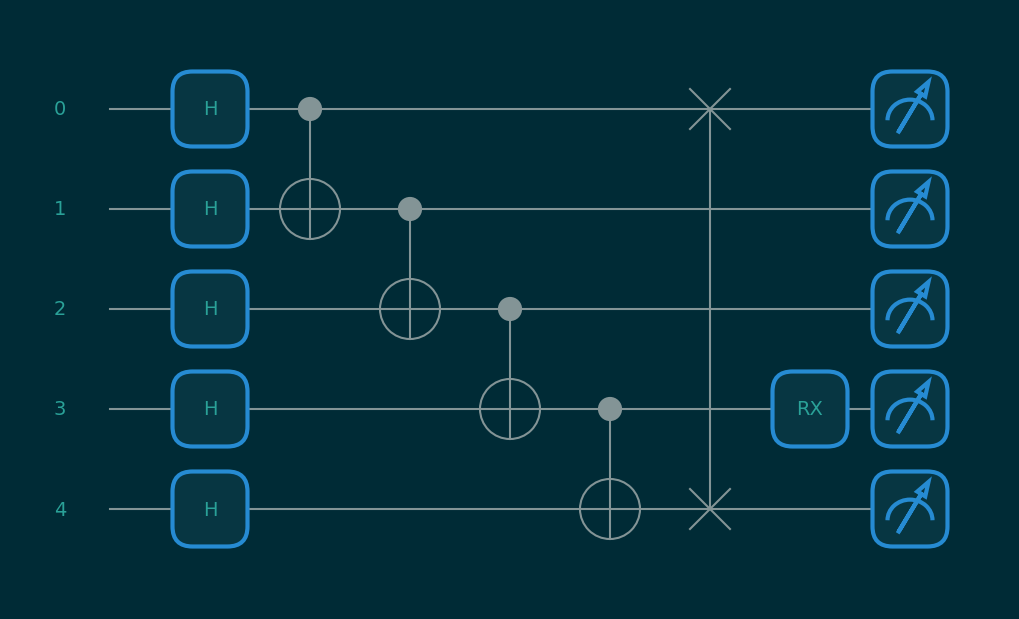

In [3]:
qml.drawer.use_style("solarized_dark")
qml.draw_mpl(circ1,expansion_strategy="device")()

In [4]:
circ1()

array([0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125])

In [5]:
num_qubits = 4+1 # 1 ancilla qubit to store the inner product
dev2 = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev2)
def circ2():
  qml.Hadamard(wires=0)
  qml.RX(np.pi/3, wires=1)
  qml.Hadamard(wires=2)
  qml.Hadamard(wires=3)

  # SWAP TEST Between |q0q1> and |q2q3>
  qml.Hadamard(wires=4)
  qml.CSWAP(wires=[4,0,1])
  qml.CSWAP(wires=[4,2,3])
  qml.Hadamard(wires=4)

  return qml.probs(wires=4)

(<Figure size 700x600 with 1 Axes>, <Axes: >)

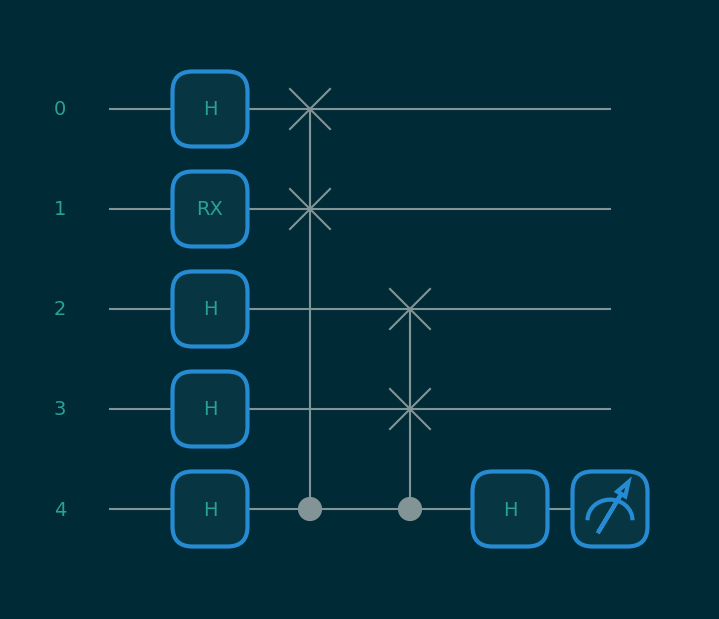

In [6]:
qml.drawer.use_style("solarized_dark")
qml.draw_mpl(circ2,expansion_strategy="device")()

In [7]:
circ2()

array([0.75, 0.25])